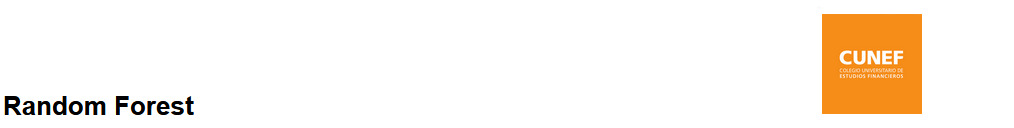

<table text-align="left"; style="width: 100%;"  >
<tbody>

<tr text-align="center">
<td width="19%" bgcolor="orange" ><FONT FONT SIZE="+1" COLOR="WHITE">Autores</FONT>&nbsp;</td>
<td width="73%" bgcolor="WHITE" align="center"><FONT FONT SIZE="+1" COLOR="ORANGE" >Correo</FONT>&nbsp;</td>
</tr>

<tr>
<td>&nbsp;</td>
<td> &nbsp;</td>
<td> &nbsp;</td>
<td>&nbsp;</td>
</tr>
<tr>
<td width="5%"; bgcolor="orange" border = "4"><FONT FONT SIZE="+0.2" COLOR="WHITE">Valentina Díaz Torres</FONT>&nbsp;</td>
<td width="5%"; bgcolor="WHITE"><FONT FONT SIZE="+0.5" COLOR="ORANGE">Valentina.diaz@cunef.edu</FONT>&nbsp;</td>
</tr>

<tr>
<td width="5%"; bgcolor="orange"><FONT FONT SIZE="+0.2" COLOR="WHITE">Francisco del Val Yague</FONT>&nbsp;</td>

<td width="5%"; bgcolor="WHITE"><FONT FONT SIZE="+0.5" COLOR="ORANGE">Francisco.delval@cunef.edu</FONT>&nbsp;</td>
</tr>
<tr>
<td width="5%"; bgcolor="orange"><FONT FONT SIZE="+0.5" COLOR="WHITE">Alejandro García Girón</FONT>&nbsp;</td>

<td width="5%"; bgcolor="WHITE"><FONT FONT SIZE="+0.5" COLOR="ORANGE">A.garciagiron@cunef.edu</FONT>&nbsp;</td>
</tr>
    
</tbody>
</table>

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'emp_length', 'home_ownership', 'annual_inc',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=134)
Las columna son iguales
Las columna son iguales
Las columna son iguales
Las columna son iguales
Las columna son iguales
Las columna son iguales
Las columna son iguales
term
pymnt_plan
initial_list_status
application_type
hardship_flag
disbursement_method
debt_settlement_flag


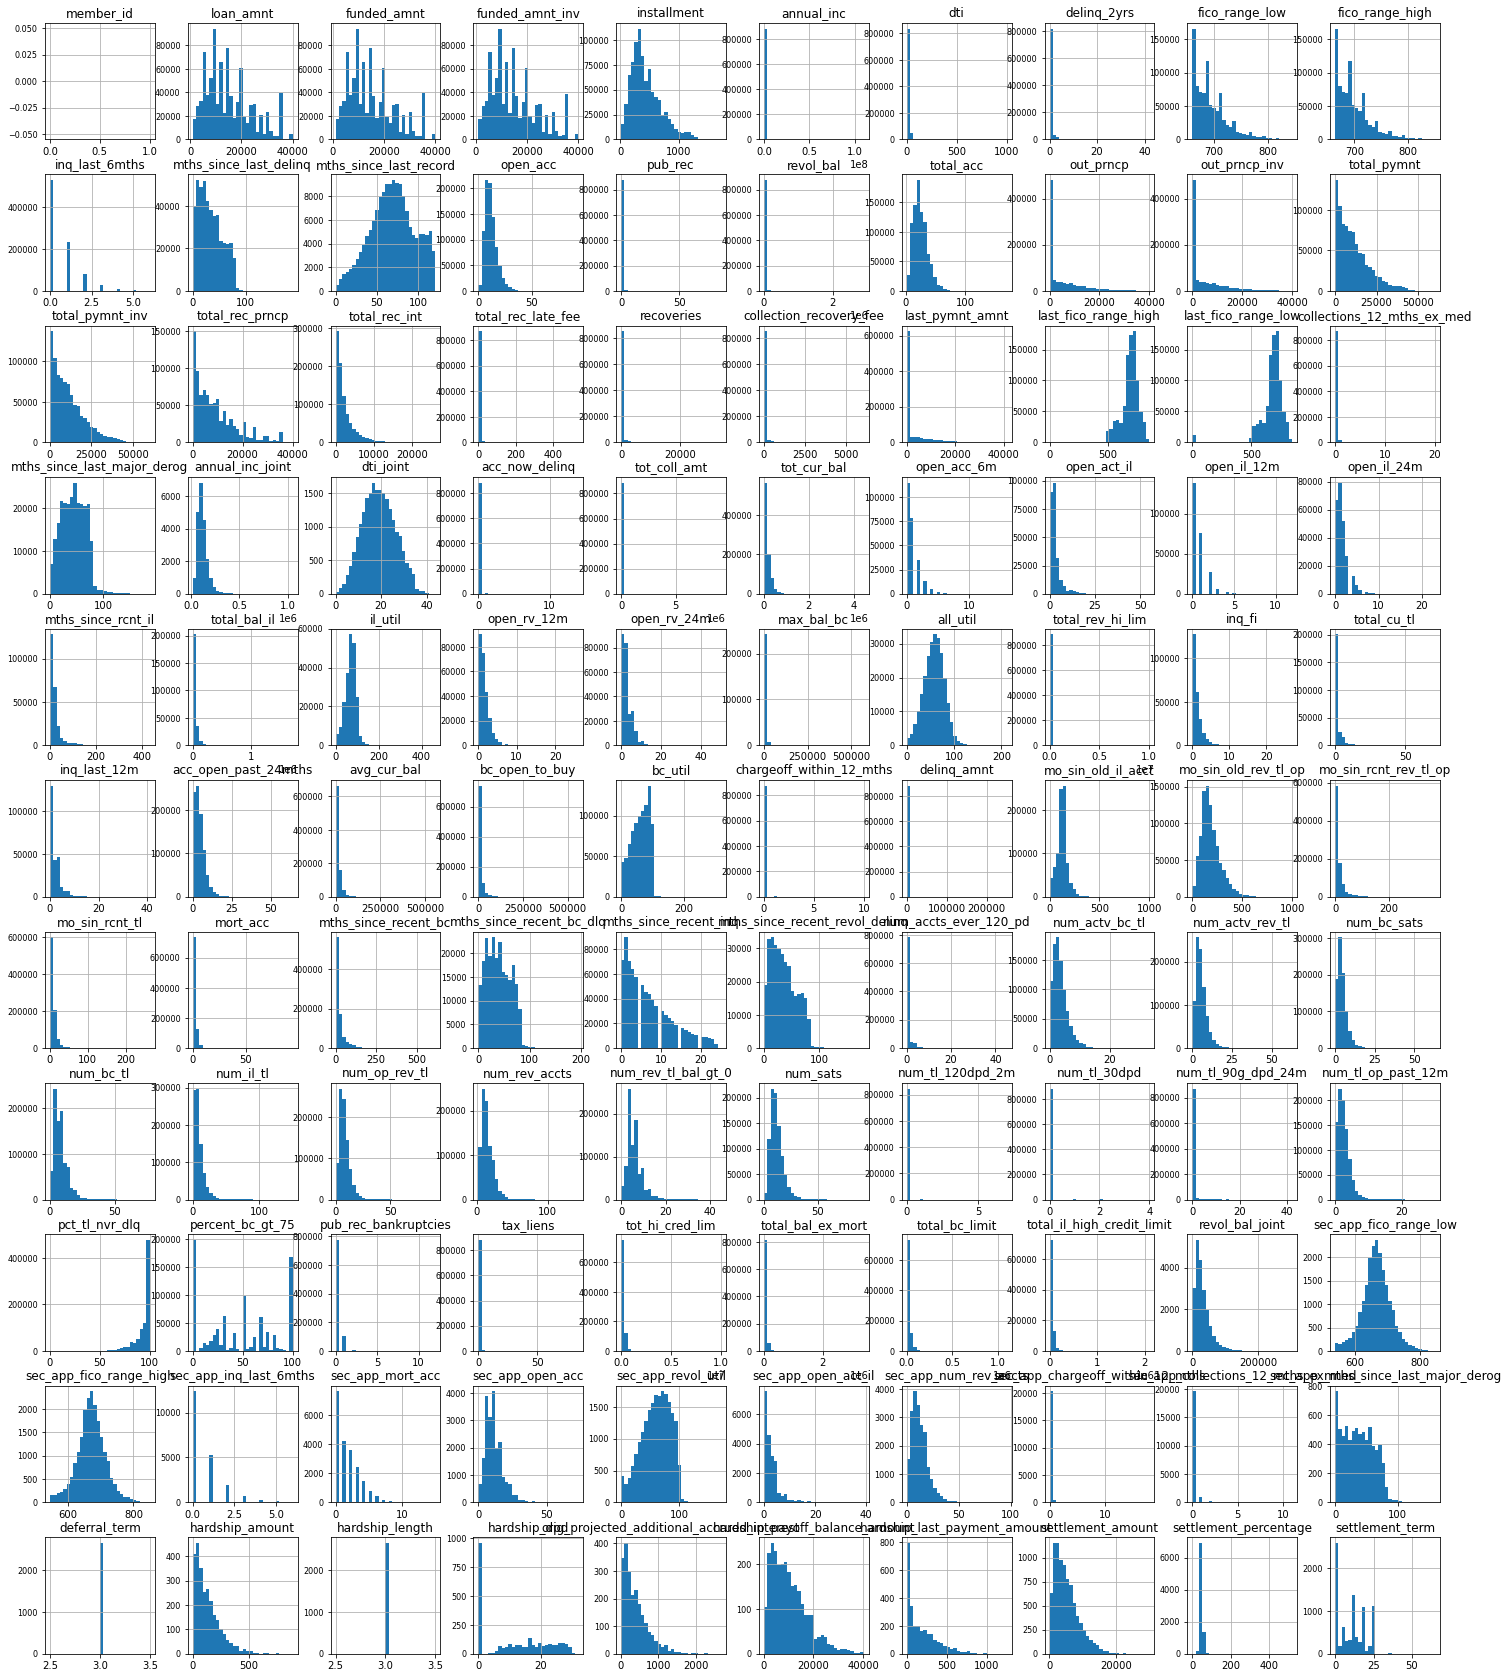

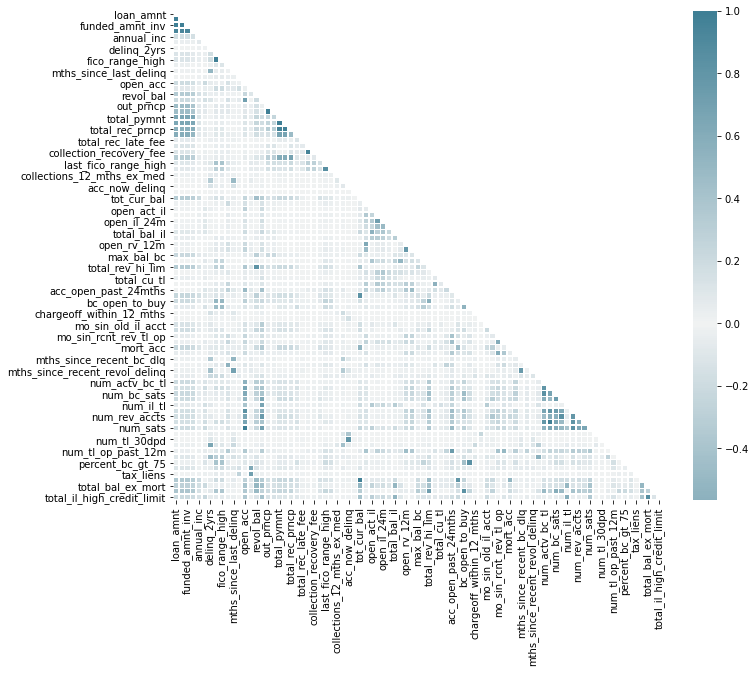

In [1]:
import sys
sys.path.append("../00_eda_ingeniera_variables")

from eda_ingenieria_de_variable import *

------------------

### Random Forest

**1. Definición**

El Random Forest es un algoritmo de aprendizaje supervisado. El "bosque" que construye, es un conjunto de árboles de decisión, generalmente entrenados con el método de "bagging". La idea general del método de bagging es que una combinación de modelos de aprendizaje aumenta el resultado general.

El Random Forest es otro algoritmo de aprendizaje supervisado que empleamos como alternativa a u solo árbol de decisión ya que este solo generaría mucho overfitting por su naturaleza y solo sería buen predictor con determinadas características.




<img src=https://hardtasksin.files.wordpress.com/2019/06/random-e1561729980815.png>

 **2. Librerías**

In [16]:
#Librerías manipulación dataframe
import numpy as np
import pandas as pd

# Gráficos
import matplotlib
from matplotlib import pyplot as plt 
import seaborn as sns 

# Metricas
#from scipy import stats as sts # normality test JB 
from sklearn import model_selection, linear_model, metrics
from sklearn.linear_model import LogisticRegression
#from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split # split data
from sklearn.metrics import mean_squared_error,accuracy_score, plot_confusion_matrix, confusion_matrix, roc_auc_score, roc_curve
from sklearn import preprocessing # estandarization
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer

from math import sqrt # sqrt
import itertools # aplanar arrays
import math

import pickle
import random
random.seed(1984)

In [3]:
#Separamos la variable target del resto del dataset
X = data.drop(['loan_status_Paga'],axis=1)

#Análogamente que arriba pero esta vez obviamos el resto de la target
Y = data['loan_status_Paga']

In [4]:
#Con esta función separamos la parte de train y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [5]:
#Aplicamos el modelo 
estimator = RandomForestClassifier(1000, random_state=1984, n_jobs=-1)

#Entrenamiento del modelo
estimator.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=1984)

**3.Predicción**

In [6]:
#hacemos la predicción
prediccion = estimator.predict(X_test)

#En el print del resultado 0 sería no concedido y 1 sería concedido
print(prediccion)

[1 1 1 ... 1 1 1]


**4. Precisión del modelo**

In [7]:
accuracy_score(Y_test, prediccion)

0.7580242105604778

Importancia de las columnas:

En el Random Forest podemos ver como ha sido el impacto de las variables en el modelo, esto nos puede servir como indicador para saber que variables estan sosteniendo el resultado del modelo. 

In [8]:
importancia = pd.DataFrame(estimator.feature_importances_,
                          X_test.columns,
                          columns= ['Importance']).sort_values(by= ['Importance'],
                                                               ascending = False)
importancia

,Importance
dti,0.052600
avg_cur_bal,0.043838
mo_sin_old_rev_tl_op,0.042625
bc_open_to_buy,0.041694
term_ 36,0.041213
bc_util,0.039948
annual_inc,0.039716
mo_sin_old_il_acct,0.039702
total_bal_ex_mort,0.039435
total_rev_hi_lim,0.038698


**5. Matrices de confusión**

In [11]:
confusion_matrix(Y_test, prediccion)

array([[ 3131, 20282],
       [ 2086, 66940]], dtype=int64)

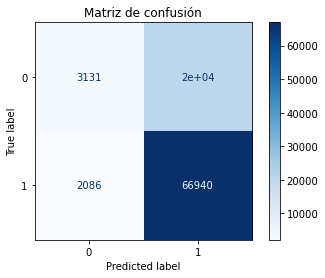

In [10]:
disp = plot_confusion_matrix(estimator, X_test, Y_test,
                                 #display_labels= Y,
                                 cmap=plt.cm.Blues);
disp.ax_.set_title('Matriz de confusión');

#### Matriz de confusión normalizada

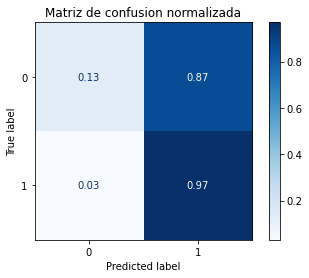

In [12]:
disp = plot_confusion_matrix(estimator, X_test, Y_test,
                                 #display_labels= Y,
                                 cmap=plt.cm.Blues,
                                 normalize= 'true');
disp.ax_.set_title('Matriz de confusion normalizada');

Como podemos observar, la matriz anterior nos muestra que del total de los casos a los que no se les concedería el prestamo, sí se le concede a un 19% que son falsos negativos. Y del total de creditos que sí se concede, denegamos un 6,7%  que son falsos positivos. Esto significa que nuestro modelo tiende a generar mas falsos negativos que positivos por lo tanto trasladando esto a la problematica del coste no sería el peor escenario ya que la insolvencia penaliza al banco con el aumento de los falsos positivos. 

#### Curva ROC

Esta es una representación gráfica de la sensibilidad frente a la especificidad para un sistema clasificador binario según se varía el umbral de discriminación.

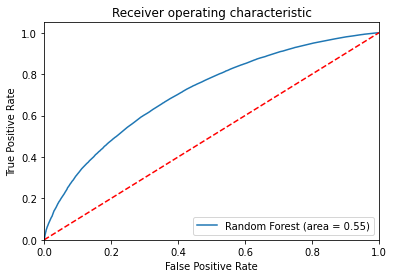

In [13]:
#revisar
random_auc = roc_auc_score(Y_test, estimator.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, estimator.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % random_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Random Forest')
plt.show()

La curva ROC es un disganóstico gráfico sobre la precision del modelo a la hora de conceder o no el crédito. La linea azul nos informa de la representatividad, ambos ejes del gráfico incluyen valores entre 0 y 1.

Cuanto más pegada esté la línea azul al eje y por tanto abarque más area mejor sera el modelo.

In [19]:
#Guardamos el modelo
model = estimator
filename = 'rf_model.sav'
pickle.dump(model, open(filename, 'wb'))

MemoryError: 